# 2024-10-18 Intro aperture photometry

## Overview

+ Reason through "tricky" aspects of counting pixels
+ Think about how to separate starlight from background

## Part 1: Counting background

In [1]:
from astropy.modeling.models import Gaussian2D
from matplotlib import pyplot as plt

import numpy as np

In [2]:
rng = np.random.default_rng(seed=548975)

In [3]:
image_size = 10

background_image = rng.poisson(lam=200, size=[image_size, image_size])

In [4]:
def circle(x, y, radius):
    angle = np.linspace(0, 2 * np.pi)
    return x + radius * np.cos(angle), y + radius * np.sin(angle)

In [5]:
circ = circle(5, 5, 2.1)

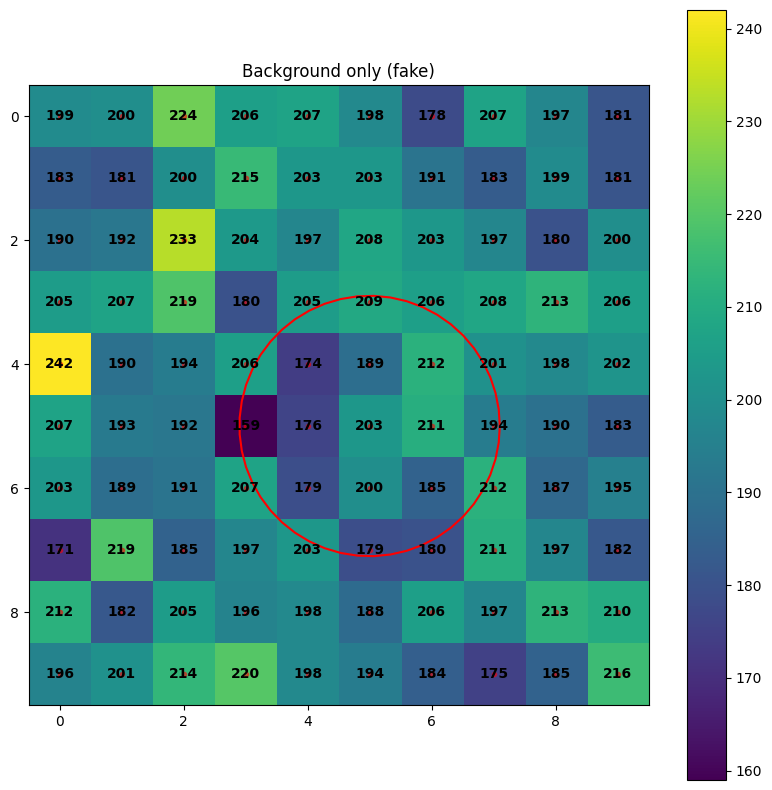

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(background_image)
plt.colorbar()
for i in range(image_size):
    for j in range(image_size):
        plt.text(i, j, int(background_image[j, i]), 
                 fontweight='bold',
                 color='black',
                 horizontalalignment='center',
                 verticalalignment='center')
        plt.scatter(i, j, marker='.', c='red', alpha=0.5)

plt.title("Background only (fake)")
plt.plot(circ[0], circ[1], color='red');
        

## Part 2: Now with a star....

In [7]:
star = Gaussian2D(amplitude=200, x_stddev=1.25, y_stddev=1.25)
grids = np.mgrid[0:10, 0:10]
star_grid = star(grids[0] - 5, grids[1] - 5)

In [8]:
total_image = background_image + star_grid

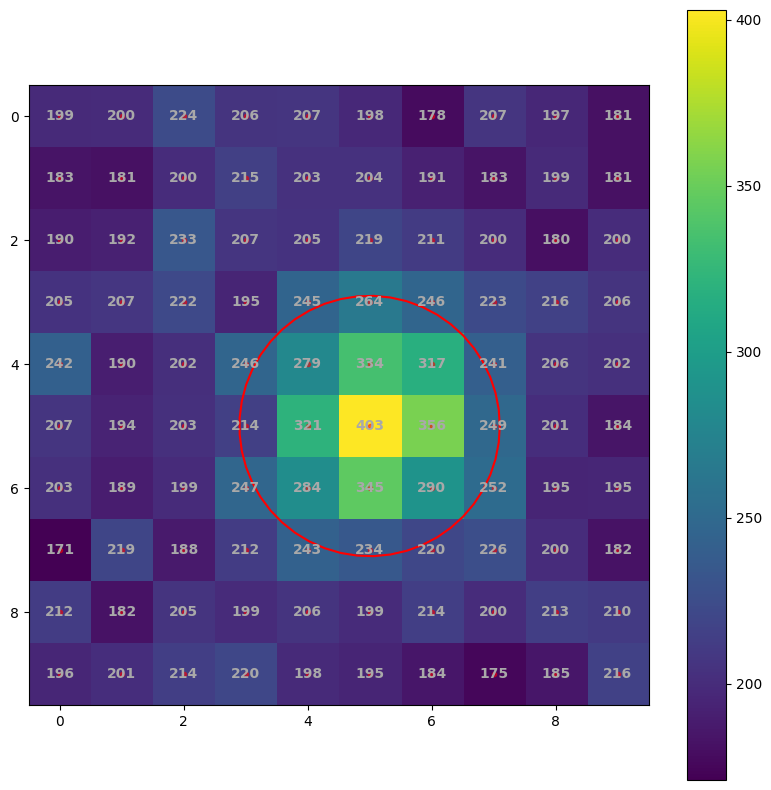

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(total_image)
plt.colorbar()
for i in range(image_size):
    for j in range(image_size):
        plt.text(i, j, int(total_image[j, i]), 
                 fontweight='bold',
                 color='darkgray',
                 horizontalalignment='center',
                 verticalalignment='center')
        plt.scatter(i, j, marker='.', c='red', alpha=0.5)

plt.plot(circ[0], circ[1], color='red');
        

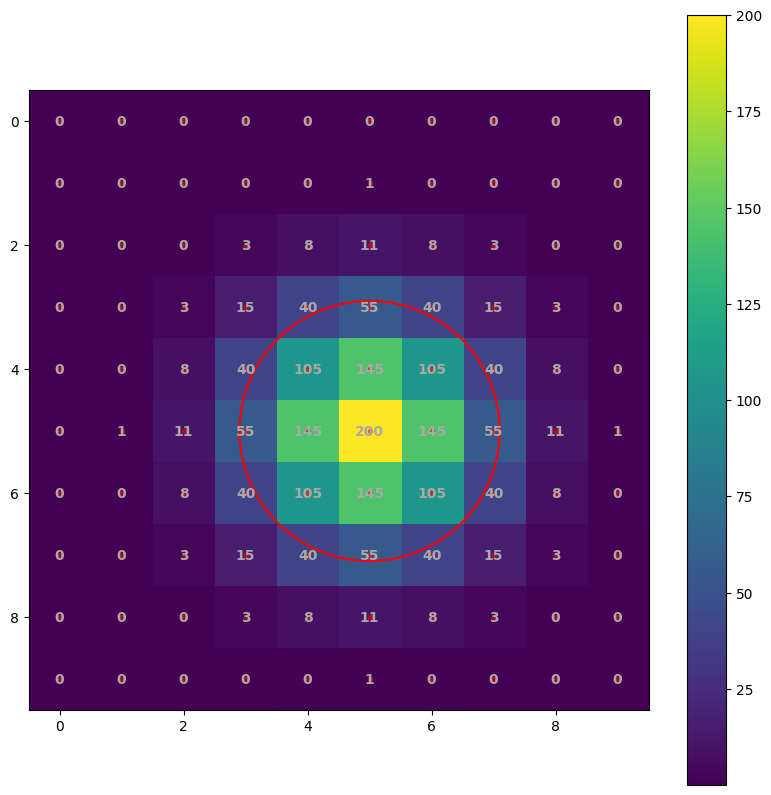

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(star_grid)
plt.colorbar()
for i in range(image_size):
    for j in range(image_size):
        plt.text(i, j, int(star_grid[j, i]), 
                 fontweight='bold',
                 color='darkgray',
                 horizontalalignment='center',
                 verticalalignment='center')
        plt.scatter(i, j, marker='.', c='red', alpha=0.5)

plt.plot(circ[0], circ[1], color='red');
     